# Question 1 Gradient Discent

In [9]:
import numpy as np
import math
import pylab as pl
import random

%matplotlib inline

In [10]:
def negativeGaussian(x,mu,Sigma):
    detSigma = np.linalg.det(Sigma)
    n = len(x)
    NC = -((1/(np.sqrt(2*math.pi)**2)*detSigma)) # normalizing constant
    normalizedX = [a - b for a, b in zip(x, mu)] 
    invSigma = np.linalg.inv(Sigma)
    kernel = np.exp(-0.5*(np.inner(np.inner(normalizedX,invSigma),np.transpose(normalizedX))))
    
    value = -NC*kernel
    
    gradient = -value*np.inner(invSigma,normalizedX)
    
    return(value,gradient)
    

In [11]:
def qBowl(x,b,A):
    value = 0.5*np.inner(np.inner(np.transpose(x),A),x) - np.inner(np.transpose(x),b)
    gradient = np.inner(A,x) - b
    return (value,gradient)

In [12]:
a = [25,25]
mu = [1,3.2]
A = [[2,0.3],[0.4,3]]

In [13]:
qBowl(a,mu,A)

(1676.25, array([ 56.5,  81.8]))

In [14]:
0.5*np.inner(np.inner(np.transpose(a),A),a) - np.inner(np.transpose(a),mu)

1676.25

In [15]:
def batchGradientDiscent(function,initGuess,step,threshold,maxIter,*args):
    gradientNorm = []
    epsilon = 1
    value = initGuess
    iteration = 0
    #while iteration > 1:
    #if iteration < maxIter:
    while epsilon > threshold and iteration < maxIter : 
       
        output = function(initGuess,*args)
        #print output
        
        gradient = output[1]
        newValue = value - step * gradient #GDS equation
        
        evaluateOld = function(value,*args)[0] # function evaluated at old point
        #print(evaluateOld)
        evaluateNew = function(newValue,*args)[0]# function evaluated at new point
        #print(evaluateNew)
        epsilon = abs(evaluateNew - evaluateOld)
        value = newValue
        gradient= function(value,*args)[1]
        gNorm = np.linalg.norm(gradient)
        gradientNorm .append(gNorm)
        print epsilon
            

        iteration+=1
        print(iteration)
          
        
        
    return(gradientNorm)

In [16]:
# Loading the parameters
def getData():

    # load the parameters for the negative Gaussian function and quadratic bowl function
    # return a tuple that contains parameters for Gaussian mean, Gaussian covariance,
    # A and b for quadratic bowl in order

    data = pl.loadtxt('../DataFiles/HW1/parametersp1.txt')

    gaussMean = data[0,:]
    gaussCov = data[1:3,:]

    quadBowlA = data[3:5,:]
    quadBowlb = data[5,:]

    return (gaussMean,gaussCov,quadBowlA,quadBowlb) 



In [17]:
gaussMean,gaussCov,quadBowlA,quadBowlb = getData()

In [18]:
qBowl(a,quadBowlb,quadBowlA)

(-10625.0, array([-25., -25.]))

In [19]:
quadBowlb

array([ 400.,  400.])

In [20]:
np.inner(np.linalg.inv(quadBowlA),quadBowlb)

array([ 26.66666667,  26.66666667])

In [21]:
batchGradientDiscent(negativeGaussian,[20,10],0.01,1e-19,100,gaussMean,gaussCov)

35358.505416
1
45316.6173209
2
36446.4295462
3
21064.632288
4
9159.82977184
5
3060.79533518
6
795.005747386
7
161.615373185
8
25.8281979881
9
3.2546552102
10
0.324061714159
11
0.0255340935816
12
0.0015939254265
13
7.88920894695e-05
14
3.09807686636e-06
15
9.6572865315e-08
16
2.39047981131e-09
17
4.7001158677e-11
18
7.34216766292e-13
19
9.1140128913e-15
20
8.9913599767e-17
21
7.05049220509e-19
22
4.39470371397e-21
23


[2917.0210066242635,
 2848.4097399899583,
 1899.2427880139996,
 931.82567341155357,
 346.8006574783667,
 99.429589617843206,
 22.156966595003993,
 3.8592344609212286,
 0.52737973207221989,
 0.056692765775181071,
 0.0048034589382572037,
 0.00032124412909016444,
 1.6976922248855268e-05,
 7.0959370667599824e-07,
 2.3474469691877673e-08,
 6.1498988541811826e-10,
 1.276536669750541e-11,
 2.1002186670023338e-13,
 2.7397271549355163e-15,
 2.8345601700232616e-17,
 2.3265157968361774e-19,
 1.5151661879627787e-21,
 7.8312038918676794e-24]

In [22]:
print quadBowlA
print quadBowlb

[[ 10.   5.]
 [  5.  10.]]
[ 400.  400.]


In [23]:
A = qBowl([20,0],quadBowlb,quadBowlA)[0]
B = qBowl([20,0],quadBowlb,quadBowlA)[1]
C = B*0.01
print [20,0] - C
qBowl([22,3],quadBowlb,quadBowlA)[0]

[ 22.   3.]


-7205.0

In [24]:
batchGradientDiscent(qBowl,[26,26],0.001,1e-1,10,quadBowlb,quadBowlA)

0.198499999999
1
0.195500000002
2
0.192499999999
3
0.189499999999
4
0.186500000003
5
0.183499999999
6
0.180499999997
7
0.177500000005
8
0.174499999996
9
0.1715
10


[13.930003589374937,
 13.717871555018926,
 13.505739520662912,
 13.2936074863069,
 13.081475451950968,
 12.869343417595037,
 12.657211383238943,
 12.445079348883011,
 12.232947314526918,
 12.020815280170986]

Quadratic bowl shows some very erratic behavior unless the startiing point is very clos
and the threshold is relatively larger

## Question 2

In [25]:
def finiteDifference(function,sp,h,*args):

    fdApprox = []
    for i in range(len(sp)):
        Lower = [float(j) for j in sp]
        Higher = [float(j) for j in sp]
        Lower[i] = Lower[i] - 0.5*h
        #print Lower
        Higher[i] = Higher[i] + 0.5*h
        #print Lower
        #print Higher
        higherValue = function(Higher,*args)[0]
        lowerValue = function(Lower,*args)[0]
        print higherValue
        print lowerValue
        fdApprox.append((higherValue - lowerValue)/h)
        #increment = [0.5*h + b for  b in sp]
        #higherInput = [a + b for a, b in zip(sp, increment)] 
        #lowerInput = [a - b for a, b in zip(sp, increment)]
        #higher = function( higherInput,*args)[0]
        #lower = function(lowerInput,*args)[0]
        #fdApprox = (higher - lower)/h
    return(fdApprox)


In [26]:
finiteDifference(qBowl,[1,2],10000,quadBowlb,quadBowlA)

123098835.0
126898835.0
123123835.0
126873835.0


[-380.0, -375.0]

In [27]:
qBowl([1,2],quadBowlb,quadBowlA)

(-1165.0, array([-380., -375.]))

In [28]:
A = [32,23]
A[1] = A[1]+23
A
[float(i) for i in A]

[32.0, 46.0]

In [29]:
A = [2,3]
B = [23,4]
[0.5 + b for  b in A] 


[2.5, 3.5]

# # Data for SGD

In [30]:
# Loading the data

def getData():
    
    # load the fitting data for X and y and return as elements of a tuple
    # X is a 100 by 10 matrix and y is a vector of length 100
    # Each corresponding row for X and y represents a single data sample

    X = pl.loadtxt('../DataFiles/HW1/fittingdatap1_x.txt')
    y = pl.loadtxt('../DataFiles/HW1/fittingdatap1_y.txt')

    return (X,y) 

In [31]:
X,y = getData()

In [32]:
X.shape

(100, 10)

In [33]:
A = np.dot(np.linalg.inv(np.dot(np.transpose(X),X)),np.transpose(X))

In [34]:
sp = np.inner(A,y)
sp

array([  0.5032541 ,  -2.3367948 ,  -6.31670032,   6.81230107,
        -1.06337989,   6.67469398,   3.4118044 ,  -0.45573592,
       -12.94593466,  15.73289812])

Least Square function

In [35]:
def leastSquare(theta,X,y):
    y = y.ravel()
    intermediate = np.inner(X,theta) - y
    value = np.inner(np.transpose(intermediate),intermediate)
    gradient = 2*np.inner(np.transpose(X),intermediate)
        
    return(value,gradient)


In [36]:
theta = [1,2,3,4,-5,6,7,8,9,-10]

In [37]:
#leastSquare(sp,X[1,],y[1])[1]

In [38]:
print np.linalg.norm((leastSquare(sp,X,y)[1]))
print leastSquare(sp,X,y)[1]

8.08898029578e-10
[  7.22795585e-11   3.46213943e-11   7.47740492e-11  -3.55712868e-11
   2.15244461e-11  -1.43022159e-10   8.23569515e-12   6.10197803e-11
  -6.08653302e-10  -4.95850632e-10]


In [39]:
sp

array([  0.5032541 ,  -2.3367948 ,  -6.31670032,   6.81230107,
        -1.06337989,   6.67469398,   3.4118044 ,  -0.45573592,
       -12.94593466,  15.73289812])

In [40]:
batchGradientDiscent(leastSquare,sp,0.01,1e-19,36,X,y)

1.27329258248e-11
1
3.63797880709e-12
2
1.45519152284e-11
3
2.0008883439e-11
4
1.27329258248e-11
5
1.81898940355e-12
6
1.45519152284e-11
7
1.81898940355e-12
8
1.27329258248e-11
9
0.0
10


[7.9660930842840948e-07,
 1.594041477882827e-06,
 2.3914663574340702e-06,
 3.1888408460146198e-06,
 3.9862837026355625e-06,
 4.7837352369274375e-06,
 5.5811240962023485e-06,
 6.3785109611052526e-06,
 7.1759815794085644e-06,
 7.973326024409016e-06]

In [41]:
Xsub = X[0:5,:]
ysub = y[0:5]
Xsub

array([[ -1.47200000e-01,   4.90200000e-01,  -2.26757000e+01,
          1.47657000e+01,   1.07925000e+01,  -1.73419000e+01,
         -7.58150000e+00,  -1.65327000e+01,  -6.71740000e+00,
          2.75220000e+00],
       [ -2.66000000e-02,  -3.50944000e+01,  -3.24594000e+01,
          4.04050000e+00,  -2.68454000e+01,  -1.55490000e+01,
          1.36408000e+01,  -5.82570000e+00,  -1.99688000e+01,
          2.02079000e+01],
       [  8.57100000e+00,   2.83335000e+01,  -2.60000000e-01,
          1.67877000e+01,   7.97380000e+00,   2.50168000e+01,
         -1.62684000e+01,   6.49319000e+01,   3.74096000e+01,
          4.14010000e+00],
       [ -9.33650000e+00,   1.46148000e+01,   1.53803000e+01,
         -8.95000000e+00,   1.33843000e+01,   1.17449000e+01,
         -2.25900000e-01,   4.37849000e+01,  -2.18766000e+01,
         -2.06200000e+00],
       [ -1.07327000e+01,  -1.05070000e+01,  -1.08115000e+01,
         -2.29077000e+01,  -6.43280000e+00,  -5.86710000e+00,
         -1.65026000e+01

inf

# Stochastic Gradient Discent

In [85]:
def stochasticGradientDiscent(X,Y,initGuess,threshold,maxIter,tau0,kappa):
    gradientNorm = []
    epsilon = float("Inf")
    value = initGuess
    iteration = 0

    n = X.shape[0]
    print n
    indTheta = initGuess
    k = kappa
    steps = 0
    iteration = 0
    
    
    while iteration < maxIter: 
        for i in range(n):
            if epsilon > threshold:
            
                indX = X[i,]
                #print indX
                indY = Y[i]
                y = indY.ravel()
                intermediate = np.inner(indX,indTheta) - y
                #print intermediate
                #print intermediate
                value = np.inner(np.transpose(intermediate),intermediate)
                #print value
                gradient = 2*np.transpose(indX)*intermediate
                
                #print(value)
                #print gradient
                
                #print(np.linalg.norm(gradient))
                
                etaT = (1./((tau0+steps)*np.linalg.norm(gradient)))**k
                #print etaT
                newTheta = indTheta - etaT*gradient
                newIntermediate = np.inner(indX,newTheta) - y
                
                newValue = np.inner(np.transpose(newIntermediate),newIntermediate)
                #print(newValue)
                epsilon = abs(newValue - value)
                #epsilon = np.linalg.norm(gradient)
                print(epsilon)
                #print(newTheta)
                #print indTheta
                steps= steps +1            
                indTheta = newTheta
                #print(indTheta)
                #print steps
            else:
                print "SGD converged"
                break
                
                
        iteration = iteration+1
                
        return(indTheta)

In [86]:
a = np.inner(X[0,],sp) - y[0]
print X[0,]
nu = np.linalg.norm(2*np.transpose(X[0,])*a)
eta = (1./((2+1)*nu))**0.9
print sp - eta*nu
print sp

[ -0.1472   0.4902 -22.6757  14.7657  10.7925 -17.3419  -7.5815 -16.5327
  -6.7174   2.7522]
[ -0.17906413  -3.01911302  -6.99901854   6.12998285  -1.74569812
   5.99237576   2.72948618  -1.13805415 -13.62825289  15.0505799 ]
[  0.5032541   -2.3367948   -6.31670032   6.81230107  -1.06337989
   6.67469398   3.4118044   -0.45573592 -12.94593466  15.73289812]


In [88]:
stochasticGradientDiscent(X,y,[0.1]*10,0.01,3,5,0.9)

100
10460.6593366
71556.559941
21764.0770119
6060.60629305
2044.06971037
19678.3452176
2195.90170234
3720.62156009
445.112395089
6402.92113386
2537.44301217
386.25658546
11.7240029769
5607.48809489
8319.41993468
5458.99303467
2524.62380019
6983.85689304
4771.01262829
7482.36844648
8.54160637803
11822.5722185
832.079696736
4840.1156225
3414.75267068
3901.48327822
15805.2968008
27741.9604156
4536.92749062
7669.94783293
16681.4338136
3661.01880934
6979.97968873
2298.78650449
3858.27219572
5864.30117108
1188.47975406
13643.061873
3171.53106854
1321.15514649
10987.4697831
4843.88907543
7705.1216412
3417.9820263
510.227909797
10686.7054568
5901.13872074
1909.54427694
269.060689709
9805.93328885
7784.24279713
1259.2189907
3761.81378259
2586.36943613
6737.41899108
2157.90594486
535.448260282
6350.04717595
1600.52341548
13.6127102929
3662.18543098
3623.40791398
2795.35709597
5420.78091158
376.512539342
1639.96552444
1287.20007127
3553.8574752
2042.02280826
2598.13513156
3387.64626042
2515.38806

array([-0.05674999, -0.43179969, -0.67160093,  0.15273771, -0.27350125,
        0.12975445,  0.02719175, -0.76885618, -2.62694465,  1.89948989])

In [76]:
i = 1
indTheta = sp
indX = X[i,]
indY = y[i]
value = (np.inner(np.transpose(indX),indTheta) - indY)**2
gradient = 2*(np.inner(np.transpose(indX),indTheta) - indY)*indX
#print value,gradient
#print np.linalg.norm(gradient)
tau0 = 2
k = 0.8
j = 1
etaT = (1./(tau0+(j+1)))**k
print etaT
newTheta = indTheta - etaT*gradient
#print gradient
#print etaT*gradient
print newTheta
print np.inner(np.transpose(indX),indTheta) - indY
#2*(np.inner(np.transpose(indX),newTheta) - indY)*indX

0.329876977693
[  2.27496097e-01  -3.66154899e+02  -3.42818175e+02   4.86995266e+01
  -2.79365403e+02  -1.54519334e+02   1.44823824e+02  -6.08498480e+01
  -2.19959331e+02   2.25225007e+02]
-15.7131943321


In [230]:
sp

array([  0.5032541 ,  -2.3367948 ,  -6.31670032,   6.81230107,
        -1.06337989,   6.67469398,   3.4118044 ,  -0.45573592,
       -12.94593466,  15.73289812])

In [122]:
sp

array([-41.31766813,  -0.82708803,  -7.06071553,  34.42502081,
       -30.18680803,  -0.67330762,  15.95421946,   3.48234334,
         6.73856983, -15.40532608])

In [ ]:
indX = X[i,]
indY = y[i]
value = (np.inner(np.transpose(indX),sp) - indY)**2
value
2*(np.inner(np.transpose(indX),sp) - indY)*indX

In [ ]:
def additional(function,f,d,*args):
    return(function(*args)+f**d)


In [ ]:
add(23,31)

In [ ]:
additional(mult,23,2,12,3)

In [ ]:
23**2

In [ ]:
abs(23-132)

In [ ]:
 x = np.arange(30).reshape(6,5)

In [ ]:
x[:,1]

In [ ]:
data = pl.loadtxt('../DataFiles/HW1/curvefittingp2.txt')

## Linear Basis Function Regression

In [93]:
# Data for question 2
import matplotlib.pyplot as plt
import pylab as pl

def getData(ifPlotData=True):
    # load the fitting data and (optionally) plot out for examination
    # return the X and Y as a tuple

    data = pl.loadtxt('../DataFiles/HW1/curvefittingp2.txt')

    X = data[0,:]
    Y = data[1,:]

    if ifPlotData:
        plt.plot(X,Y,'o')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.show()

    return (X,Y)

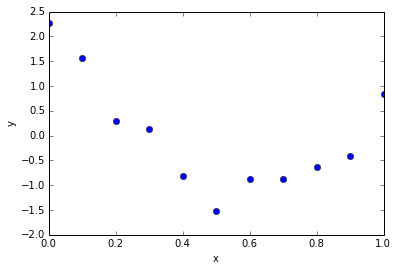

In [94]:
X,Y = getData(ifPlotData=True)


In [95]:
X

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ])

In [96]:
def LBFRegression(X,y,m):
    designMat = np.zeros((len(X),m+1))
    for i in range(m+1):
        #print([a**i for a in X])
        designMat[:,i] = [a**i for a in X]
        
        
    mle = np.inner(np.dot(np.linalg.inv(np.dot(np.transpose(designMat),designMat)),np.transpose(designMat)),y)
    fittedValues = np.dot(designMat,np.transpose(mle))
    return(mle,fittedValues)

### 2.1

In [97]:
xtrue = np.linspace(0,1,100) # 100 linearly spaced numbers
ytrue = np.cos(np.pi*xtrue)+1.5*np.cos(2*np.pi*xtrue) # computing the values of sin(x)/x
noise = np.random.normal(0,0.01,100)
ytrue = ytrue+noise


weights0 = LBFRegression(X,Y,0)[0]
m = 0
designMat = np.zeros((len(xtrue),m+1))
for i in range(m+1):
    designMat[:,i] = [a**i for a in xtrue]


fValue0 = np.inner(designMat,np.transpose(weights0))

weights1 = LBFRegression(X,Y,1)[0]
m = 1
designMat = np.zeros((len(xtrue),m+1))
for i in range(m+1):
    designMat[:,i] = [a**i for a in xtrue]


fValue1 = np.inner(designMat,np.transpose(weights1))



weights3 = LBFRegression(X,Y,3)[0]
m = 3
designMat = np.zeros((len(xtrue),m+1))
for i in range(m+1):
    designMat[:,i] = [a**i for a in xtrue]


fValue3 = np.inner(designMat,np.transpose(weights3))



weights10 = LBFRegression(X,Y,10)[0]
m = 10
designMat = np.zeros((len(xtrue),m+1))
for i in range(m+1):
    designMat[:,i] = [a**i for a in xtrue]

weights10 = LBFRegression(X,Y,10)[0]
fValue10 = np.inner(designMat,np.transpose(weights10))

In [98]:
fValue10


array([ 2.28013448,  1.79391397,  1.58741861,  1.5457288 ,  1.58651516,
        1.65331598,  1.70983853,  1.73517068,  1.71979784,  1.6623286 ,
        1.56684075,  1.44076631,  1.293242  ,  1.13385782,  0.97174315,
        0.81493557,  0.66998334,  0.54173782,  0.43329704,  0.34606615,
        0.27990509,  0.23333752,  0.20379884,  0.18790481,  0.18172494,
        0.18104813,  0.1816304 ,  0.17941703,  0.17073339,  0.15244098,
        0.1220563 ,  0.07783235,  0.01880309, -0.05520715, -0.14360672,
       -0.24508887, -0.3577091 , -0.47898339, -0.60600257, -0.73555824,
       -0.86427529, -0.9887464 , -1.10566406, -1.21194574, -1.30484852,
       -1.38206954, -1.44182946, -1.48293648, -1.50482898, -1.50759572,
       -1.49197285, -1.45931786, -1.41156108, -1.35113614, -1.28089117,
       -1.20398342, -1.1237602 , -1.04362973, -0.96692591, -0.89677134,
       -0.83594315, -0.78674658, -0.7509011 , -0.7294441 , -0.72265688,
       -0.7300174 , -0.75018398, -0.7810136 , -0.81961741, -0.86

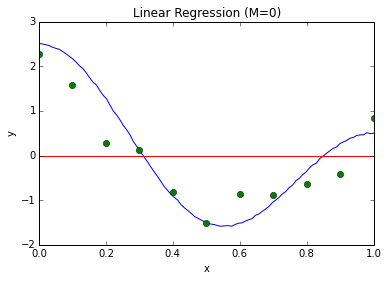

In [137]:
from pylab import savefig

plt.plot(xtrue,ytrue)
plt.plot(X,Y,'o')
plt.plot(xtrue,fValue0)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression (M=0)')
#plt.show()
pl.savefig('../ImageFiles/HW1/PolyBasis0.pdf')

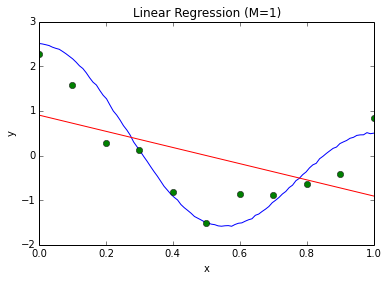

In [138]:
plt.plot(xtrue,ytrue)
plt.plot(X,Y,'o')
plt.plot(xtrue,fValue1)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression (M=1)')
#plt.show()
pl.savefig('../ImageFiles/HW1/PolyBasis1.pdf')

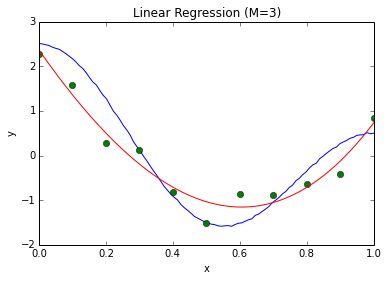

In [139]:
plt.plot(xtrue,ytrue)
plt.plot(X,Y,'o')
plt.plot(xtrue,fValue3)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression (M=3)')
#plt.show()
pl.savefig('../ImageFiles/HW1/PolyBasis3.pdf')

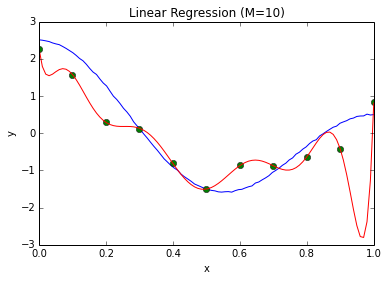

In [156]:
plt.plot(xtrue,ytrue)
plt.plot(X,Y,'o')
plt.plot(xtrue,fValue10)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression (M=10)')
#plt.show()
pl.savefig('../ImageFiles/HW1/PolyBasis10.pdf')

# SSE

In [103]:
def SSEPolynomialBasis(weight,X,y):
    error = np.inner(X,np.transpose(weight)) - y
    SSE =np.inner(error,np.transpose(error))
    SSEderivative = 2*np.inner(np.transpose(X),error)
    return(SSE,SSEderivative)

In [104]:
weights3 = LBFRegression(X,Y,3)[0]
m = 3
designMat = np.zeros((len(xtrue),m+1))
for i in range(m+1):
    designMat[:,i] = [a**i for a in xtrue]


fValue3 = np.inner(designMat,np.transpose(weights3))
print weights3

[  2.36687552 -10.73144911   6.61648601   2.48074981]


In [105]:
np.linalg.norm(SSEPolynomialBasis(weights3,designMat,ytrue)[1])

35.939655512560684

In [106]:
weight3high = weights3+0.2
weight3Low = weights3-0.2
a = SSEPolynomialBasis(weight3high,designMat,ytrue)[0]
b = SSEPolynomialBasis(weight3Low,designMat,ytrue)[0]
print a,b

29.9005967417 51.3411395387


Numerical derviative for the SSE

In [107]:
finiteDifference(SSEPolynomialBasis,weights3,0.02,designMat,ytrue)

19.8467179062
20.5284921954
20.1024878007
20.2594226376
20.1214486588
20.2378221161
20.1205975633
20.2375421198


[-34.08871446245243,
 -7.8467418420681057,
 -5.8186728649427977,
 -5.8472278229587005]

In [108]:
batchGradientDiscent(SSEPolynomialBasis,weights3,0.001,0.01,100,designMat,ytrue)

1.11677209044
1
0.766998594583
2
0.417225098731
3
0.0674516028785
4
0.282321892974
5
0.632095388826
6
0.981868884678
7
1.33164238053
8
1.68141587638
9
2.03118937224
10
2.38096286809
11
2.73073636394
12
3.08050985979
13
3.43028335564
14
3.7800568515
15
4.12983034735
16
4.4796038432
17
4.82937733905
18
5.17915083491
19
5.52892433076
20
5.87869782661
21
6.22847132246
22
6.57824481832
23
6.92801831417
24
7.27779181002
25
7.62756530587
26
7.97733880172
27
8.32711229758
28
8.67688579343
29
9.02665928928
30
9.37643278513
31
9.72620628099
32
10.0759797768
33
10.4257532727
34
10.7755267685
35
11.1253002644
36
11.4750737602
37
11.8248472561
38
12.174620752
39
12.5243942478
40
12.8741677437
41
13.2239412395
42
13.5737147354
43
13.9234882312
44
14.2732617271
45
14.6230352229
46
14.9728087188
47
15.3225822146
48
15.6723557105
49
16.0221292063
50
16.3719027022
51
16.721676198
52
17.0714496939
53
17.4212231897
54
17.7709966856
55
18.1207701814
56
18.4705436773
57
18.8203171731
58
19.170090669
59
19.5

[26.386599207914944,
 17.582034562620173,
 11.414236863129709,
 12.638164786808121,
 19.935976459502371,
 29.042118514557014,
 38.700486824299098,
 48.582839102571484,
 58.575919730716777,
 68.631377893328278,
 78.725315070685596,
 88.844617037978296,
 98.981504648473447,
 109.13107756515066,
 119.29009791592311,
 129.45634157218626,
 139.62823076986615,
 149.80461549897547,
 159.9846378996221,
 170.16764511843877,
 180.35313157425651,
 190.54069967944301,
 200.73003248698663,
 210.92087424512098,
 221.11301631661124,
 231.30628681282823,
 241.50054284794288,
 251.69566467217541,
 261.89155117317131,
 272.08811638734943,
 282.28528676632482,
 292.4829990144404,
 302.6811983629317,
 312.87983718124792,
 323.07887385112684,
 333.27827184721326,
 343.47799898133502,
 353.67802677743964,
 363.87832995157754,
 374.07888597690129,
 384.27967471789901,
 394.4806781213415,
 404.68187995394231,
 414.88326557869863,
 425.08482176341869,
 435.28653651615997,
 445.4883989432671,
 455.6903991264695

# 2.3 Cosine basis function

In [109]:
def CosBFRegression(X,y,m):
    designMat = np.zeros((len(X),m))
    for i in range(1,m+1):
        
        #print np.cos(i*np.pi*X)
        designMat[:,i-1] = np.cos(i*np.pi*X)
        
        
    mle = np.inner(np.dot(np.linalg.inv(np.dot(np.transpose(designMat),designMat)),np.transpose(designMat)),y)
    fittedValues = np.dot(designMat,np.transpose(mle))
    return(mle)

In [110]:
Y

array([ 2.2748,  1.5728,  0.2885,  0.1237, -0.81  , -1.5123, -0.8655,
       -0.8766, -0.6274, -0.4159,  0.8383])

In [115]:
cosBasis1 = np.append(CosBFRegression(X,Y,1),[0]*7)
cosBasis2 = np.append(CosBFRegression(X,Y,2),[0]*6)
cosBasis3 = np.append(CosBFRegression(X,Y,3),[0]*5)
cosBasis4 = np.append(CosBFRegression(X,Y,4),[0]*4)
cosBasis5 = np.append(CosBFRegression(X,Y,5),[0]*3)
cosBasis6 = np.append(CosBFRegression(X,Y,6),[0]*2)
cosBasis7 = np.append(CosBFRegression(X,Y,7),[0]*1)
cosBasis8 = np.append(CosBFRegression(X,Y,8),[0]*0)

In [153]:
TrueCosBasis = np.array([1,1.5,0,0,0,0,0,0])
def euclideanDistanceTrueCos(Vector):
    return np.linalg.norm(TrueCosBasis - Vector)
    
EuclideanDistance = [euclideanDistanceTrueCos(cosBasis1),euclideanDistanceTrueCos(cosBasis2),euclideanDistanceTrueCos(cosBasis3),euclideanDistanceTrueCos(cosBasis4),
                    euclideanDistanceTrueCos(cosBasis5),euclideanDistanceTrueCos(cosBasis6),euclideanDistanceTrueCos(cosBasis7),euclideanDistanceTrueCos(cosBasis8)]
EuclideanDistance 
MVector = range(1,9)
MVector

[1, 2, 3, 4, 5, 6, 7, 8]

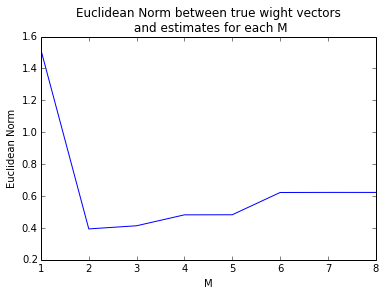

In [173]:
plt.plot(MVector,EuclideanDistance)

plt.xlabel('M')
plt.ylabel('Euclidean Norm')
plt.title('Euclidean Norm between true wight vectors\n and estimates for each M')

plt.show()
pl.savefig('../ImageFiles/HW1/CosBasisDifference.pdf')

In [ ]:
np.cos(4*np.pi*X)

# Ridge Regression 

In [200]:
# Data for question 3

import pdb
import random
import pylab as pl

# X is an array of N data points (one dimensional for now), that is, NX1
# Y is a Nx1 column vector of data values

def getData(name):
    data = pl.loadtxt(name)
    # Returns column matrices
    X = data[0:1].T
    Y = data[1:2].T
    return X, Y

def regressAData():
    return getData('../DataFiles/HW1/regressA_train.txt')

def regressBData():
    return getData('../DataFiles/HW1/regressB_train.txt')

def validateData():
    return getData('../DataFiles/HW1/regress_validate.txt')

In [201]:
regressAData()[0]

array([[ 1.29946363],
       [-0.80608991],
       [ 0.7569518 ],
       [-2.62790749],
       [-1.50589984],
       [-2.83632079],
       [-2.72378643],
       [ 1.13817614],
       [-1.23794415],
       [-1.40714309],
       [ 2.40714309],
       [ 2.30714309],
       [ 0.90714309]])

In [158]:
def ridgeRegression(X,y,lambdaShrink,m):
    designMat = np.zeros((len(X),m+1))
    for i in range(m+1):
        #print([a**i for a in X])
        designMat[:,i] = [a**i for a in X]
        designMat[:,i] = [j - np.mean(y) for j in designMat[:,i]] # Centering X's
        
    y = y.ravel() 
    
    yCentered = [j - np.mean(y) for j in y] # Centering y's
    
    mle = np.inner(np.dot(np.linalg.inv(np.dot(np.transpose(designMat),designMat)+lambdaShrink*np.identity(m+1)),np.transpose(designMat)),yCentered)
    fittedValues = np.dot(designMat,np.transpose(mle))
    return(mle,fittedValues)
    

Ridge regression fit for M = 1 for various lamdas

In [184]:
RRLambda0_1M1 = ridgeRegression(X,Y,0.1,1)[0]
RRLambda0_5M1 = ridgeRegression(X,Y,0.5,1)[0]
RRLambda1M1 = ridgeRegression(X,Y,1,1)[0]
RRLambda2M1 = ridgeRegression(X,Y,2,1)[0]
RRLambda5M1 = ridgeRegression(X,Y,5,1)[0]
W1 = ['w0','w1']
RRLambda2M1

array([ 0.23968251, -0.56587693])

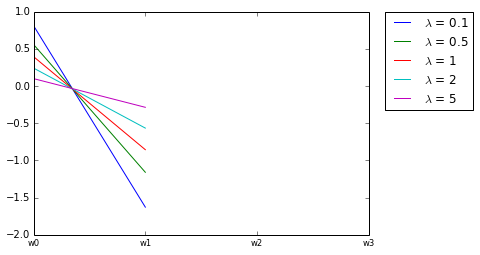

In [193]:
#plt.bar(range(len(t12)), t12, align='center')
#plt.xticks(range(len(t12)), t11, size='small')
#plt.show()
plt.plot(range(len(RRLambda0_1M1)),RRLambda0_1M1,label='$\lambda$ = 0.1')
plt.plot(range(len(RRLambda0_5M1)),RRLambda0_5M1,label='$\lambda$ = 0.5')
plt.plot(range(len(RRLambda1M1)),RRLambda1M1,label='$\lambda$ = 1')
plt.plot(range(len(RRLambda2M1)),RRLambda2M1,label='$\lambda$ = 2')
plt.plot(range(len(RRLambda5M1)),RRLambda5M1,label='$\lambda$ = 5')
plt.xticks(range(len(W1)),W1, size='small')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

Ridge regression fit for M = 3 for various lamdas

In [190]:
RRLambda0_1M3 = ridgeRegression(X,Y,0.1,3)[0]
RRLambda0_5M3 = ridgeRegression(X,Y,0.5,3)[0]
RRLambda1M3 = ridgeRegression(X,Y,1,3)[0]
RRLambda2M3 = ridgeRegression(X,Y,2,3)[0]
RRLambda5M3 = ridgeRegression(X,Y,5,3)[0]
W1 = ['w0','w1','w2','w3']
RRLambda2M1

array([ 0.23968251, -0.56587693])

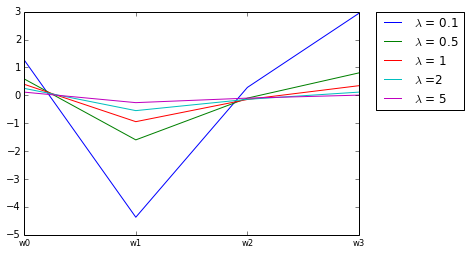

In [194]:
# Adding label to the plot
plt.plot(range(len(RRLambda0_1M3)),RRLambda0_1M3,label='$\lambda$ = 0.1')
plt.plot(range(len(RRLambda0_5M3)),RRLambda0_5M3,label='$\lambda$ = 0.5')
plt.plot(range(len(RRLambda1M3)),RRLambda1M3,label='$\lambda$ = 1')
plt.plot(range(len(RRLambda2M3)),RRLambda2M3,label='$\lambda$ =2')
plt.plot(range(len(RRLambda5M3)),RRLambda5M3,label='$\lambda$ = 5')
plt.xticks(range(len(W1)),W1, size='small')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

Ridge regression fit for M = 5 for various lamdas

In [195]:
RRLambda0_1M5 = ridgeRegression(X,Y,0.1,5)[0]
RRLambda0_5M5 = ridgeRegression(X,Y,0.5,5)[0]
RRLambda1M5 = ridgeRegression(X,Y,1,5)[0]
RRLambda2M5 = ridgeRegression(X,Y,2,5)[0]
RRLambda5M5 = ridgeRegression(X,Y,5,5)[0]
W1 = ['w0','w1','w2','w3','w4','w5']
RRLambda2M1

array([ 0.23968251, -0.56587693])

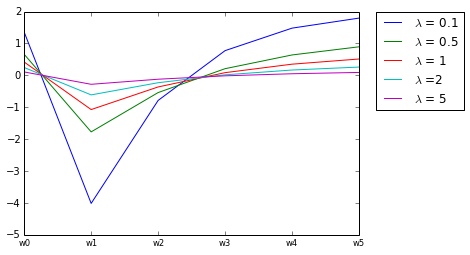

In [196]:
# Adding label to the plot
plt.plot(range(len(RRLambda0_1M5)),RRLambda0_1M5,label='$\lambda$ = 0.1')
plt.plot(range(len(RRLambda0_5M5)),RRLambda0_5M5,label='$\lambda$ = 0.5')
plt.plot(range(len(RRLambda1M5)),RRLambda1M5,label='$\lambda$ = 1')
plt.plot(range(len(RRLambda2M5)),RRLambda2M5,label='$\lambda$ =2')
plt.plot(range(len(RRLambda5M5)),RRLambda5M5,label='$\lambda$ = 5')
plt.xticks(range(len(W1)),W1, size='small')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

Ridge regression fit for M = 10 for various lamdas

In [197]:
RRLambda0_1M10 = ridgeRegression(X,Y,0.1,10)[0]
RRLambda0_5M10 = ridgeRegression(X,Y,0.5,10)[0]
RRLambda1M10 = ridgeRegression(X,Y,1,10)[0]
RRLambda2M10 = ridgeRegression(X,Y,2,10)[0]
RRLambda5M10 = ridgeRegression(X,Y,5,10)[0]
W1 = ['w0','w1','w2','w3','w4','w5','w6','w7','w8','w9','w10']
RRLambda2M1

array([ 0.23968251, -0.56587693])

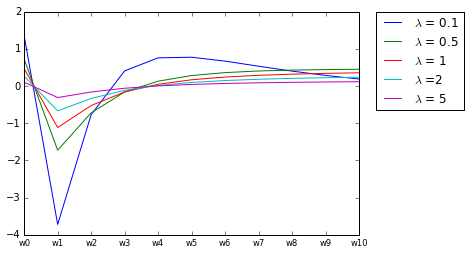

In [198]:
# Adding label to the plot
plt.plot(range(len(RRLambda0_1M10)),RRLambda0_1M10,label='$\lambda$ = 0.1')
plt.plot(range(len(RRLambda0_5M10)),RRLambda0_5M10,label='$\lambda$ = 0.5')
plt.plot(range(len(RRLambda1M10)),RRLambda1M10,label='$\lambda$ = 1')
plt.plot(range(len(RRLambda2M10)),RRLambda2M10,label='$\lambda$ =2')
plt.plot(range(len(RRLambda5M10)),RRLambda5M10,label='$\lambda$ = 5')
plt.xticks(range(len(W1)),W1, size='small')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

Test 1

In [270]:
Train1_X = regressAData()[0]
Train1_Y = regressAData()[1]
Test1_X = regressBData()[0]
Test1_Y = regressBData()[1]
valid1_X =validateData()[0]
valid1_Y = validateData()[1]

In [271]:
def LBFRidgeRegression(theta,X,y,lambda_shrinkage):
    params = len(theta)
    #print (m)
    designMat = np.zeros((len(X),params))
    for i in range(params):
        #print([a**i for a in X])
        designMat[:,i] = [a**i for a in X]
        #designMatTemp[:,i] = [a**i for a in X]
        designMat[:,i] = [j - np.mean(y) for j in designMat[:,i]] # Centering X's
    
    y = y.ravel() 
    yCentered = [j - np.mean(y) for j in y]  # Centering y's
    
    
    fittedValues = np.dot(designMat,np.transpose(theta))
    fittedDifference = [a - b for a, b in zip(fittedValues,yCentered)]
    RSS = sum(a**2 for a in fittedDifference)+lambda_shrinkage*np.dot(theta,np.transpose(theta))
    return(fittedValues,RSS)

In [272]:
# Lambdas to be tested are 0.1,0.5,1,2,3,5 and the M's are 1,3,5,10
ridgeParam = ridgeRegression(valid1_X,valid1_Y,0.6,1)[0]

#ridgeParam

In [273]:
LBFRidgeRegression(ridgeParam,valid1_X,valid1_Y,1)[1]

14.386760182846109

M =  1

In [274]:
ridgeParamLambda0_1M1 = ridgeRegression(Train1_X,Train1_Y,0.1,1)[0]
ridgeParamLambda0_5M1 = ridgeRegression(Train1_X,Train1_Y,0.5,1)[0]
ridgeParamLambda1M1 = ridgeRegression(Train1_X,Train1_Y,1,1)[0]
ridgeParamLambda2M1 = ridgeRegression(Train1_X,Train1_Y,2,1)[0]
ridgeParamLambda5M1 = ridgeRegression(Train1_X,Train1_Y,5,1)[0]

In [275]:
errorLambda0_1M1 = LBFRidgeRegression(ridgeParamLambda0_1M1,valid1_X ,valid1_Y,0.1)[1]
errorLambda0_5M1 = LBFRidgeRegression(ridgeParamLambda0_5M1,valid1_X ,valid1_Y,0.5)[1]
errorLambda1M1 = LBFRidgeRegression(ridgeParamLambda1M1,valid1_X ,valid1_Y,1)[1]
errorLambda2M1 = LBFRidgeRegression(ridgeParamLambda2M1,valid1_X ,valid1_Y,2)[1]
errorLambda5M1 = LBFRidgeRegression(ridgeParamLambda5M1,valid1_X ,valid1_Y,5)[1]


M = 3

In [276]:
ridgeParamLambda0_1M3 = ridgeRegression(Train1_X,Train1_Y,0.1,3)[0]
ridgeParamLambda0_5M3 = ridgeRegression(Train1_X,Train1_Y,0.5,3)[0]
ridgeParamLambda1M3 = ridgeRegression(Train1_X,Train1_Y,1,3)[0]
ridgeParamLambda2M3 = ridgeRegression(Train1_X,Train1_Y,2,3)[0]
ridgeParamLambda5M3 = ridgeRegression(Train1_X,Train1_Y,5,3)[0]

In [277]:
errorLambda0_1M3 = LBFRidgeRegression(ridgeParamLambda0_1M3,valid1_X ,valid1_Y,0.1)[1]
errorLambda0_5M3 = LBFRidgeRegression(ridgeParamLambda0_5M3,valid1_X ,valid1_Y,0.5)[1]
errorLambda1M3 = LBFRidgeRegression(ridgeParamLambda1M3,valid1_X ,valid1_Y,1)[1]
errorLambda2M3 = LBFRidgeRegression(ridgeParamLambda2M3,valid1_X ,valid1_Y,2)[1]
errorLambda5M3 = LBFRidgeRegression(ridgeParamLambda5M3,valid1_X ,valid1_Y,5)[1]

M = 5

In [278]:
ridgeParamLambda0_1M5 = ridgeRegression(Train1_X,Train1_Y,0.1,5)[0]
ridgeParamLambda0_5M5 = ridgeRegression(Train1_X,Train1_Y,0.5,5)[0]
ridgeParamLambda1M5 = ridgeRegression(Train1_X,Train1_Y,1,5)[0]
ridgeParamLambda2M5 = ridgeRegression(Train1_X,Train1_Y,2,5)[0]
ridgeParamLambda5M5 = ridgeRegression(Train1_X,Train1_Y,5,5)[0]

In [279]:
errorLambda0_1M5 = LBFRidgeRegression(ridgeParamLambda0_1M5,valid1_X ,valid1_Y,0.1)[1]
errorLambda0_5M5 = LBFRidgeRegression(ridgeParamLambda0_5M5,valid1_X ,valid1_Y,0.5)[1]
errorLambda1M5 = LBFRidgeRegression(ridgeParamLambda1M5,valid1_X ,valid1_Y,1)[1]
errorLambda2M5 = LBFRidgeRegression(ridgeParamLambda2M5,valid1_X ,valid1_Y,2)[1]
errorLambda5M5 = LBFRidgeRegression(ridgeParamLambda5M5,valid1_X ,valid1_Y,5)[1]

M = 10

In [280]:
ridgeParamLambda0_1M10 = ridgeRegression(Train1_X,Train1_Y,0.1,10)[0]
ridgeParamLambda0_5M10 = ridgeRegression(Train1_X,Train1_Y,0.5,10)[0]
ridgeParamLambda1M10 = ridgeRegression(Train1_X,Train1_Y,1,10)[0]
ridgeParamLambda2M10 = ridgeRegression(Train1_X,Train1_Y,2,10)[0]
ridgeParamLambda5M10 = ridgeRegression(Train1_X,Train1_Y,5,10)[0]

In [281]:
errorLambda0_1M10 = LBFRidgeRegression(ridgeParamLambda0_1M10,valid1_X ,valid1_Y,0.1)[1]
errorLambda0_5M10 = LBFRidgeRegression(ridgeParamLambda0_5M10,valid1_X ,valid1_Y,0.5)[1]
errorLambda1M10 = LBFRidgeRegression(ridgeParamLambda1M10,valid1_X ,valid1_Y,1)[1]
errorLambda2M10 = LBFRidgeRegression(ridgeParamLambda2M10,valid1_X ,valid1_Y,2)[1]
errorLambda5M10 = LBFRidgeRegression(ridgeParamLambda5M10,valid1_X ,valid1_Y,5)[1]

In [282]:
errorM1 = [errorLambda0_1M1,errorLambda0_5M1,errorLambda1M1,errorLambda2M1,errorLambda5M1]
errorM3 = [errorLambda0_1M3,errorLambda0_5M3,errorLambda1M3,errorLambda2M3,errorLambda5M3]
errorM5 = [errorLambda0_1M5,errorLambda0_5M5,errorLambda1M5,errorLambda2M5,errorLambda5M5]
errorM10 = [errorLambda0_1M10,errorLambda0_5M10,errorLambda1M10,errorLambda2M10,errorLambda5M10]
W1 = ['0.1','0.5','1','2','5']

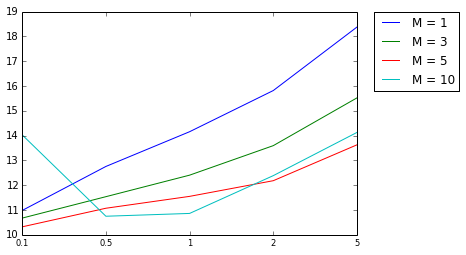

In [283]:
# Adding label to the plot
plt.plot(range(len(errorM1)),errorM1,label='M = 1')
plt.plot(range(len(errorM3)),errorM3,label='M = 3')
plt.plot(range(len(errorM5)),errorM5,label='M = 5')
plt.plot(range(len(errorM10)),errorM10,label='M = 10')

plt.xticks(range(len(W1)),W1, size='small')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

# Test 2

In [285]:
Train1_X = regressBData()[0]
Train1_Y = regressBData()[1]
Test1_X = regressAData()[0]
Test1_Y = regressAData()[1]

M =  1

In [286]:
ridgeParamLambda0_1M1 = ridgeRegression(Train1_X,Train1_Y,0.1,1)[0]
ridgeParamLambda0_5M1 = ridgeRegression(Train1_X,Train1_Y,0.5,1)[0]
ridgeParamLambda1M1 = ridgeRegression(Train1_X,Train1_Y,1,1)[0]
ridgeParamLambda2M1 = ridgeRegression(Train1_X,Train1_Y,2,1)[0]
ridgeParamLambda5M1 = ridgeRegression(Train1_X,Train1_Y,5,1)[0]

In [287]:
errorLambda0_1M1 = LBFRidgeRegression(ridgeParamLambda0_1M1,valid1_X ,valid1_Y,0.1)[1]
errorLambda0_5M1 = LBFRidgeRegression(ridgeParamLambda0_5M1,valid1_X ,valid1_Y,0.5)[1]
errorLambda1M1 = LBFRidgeRegression(ridgeParamLambda1M1,valid1_X ,valid1_Y,1)[1]
errorLambda2M1 = LBFRidgeRegression(ridgeParamLambda2M1,valid1_X ,valid1_Y,2)[1]
errorLambda5M1 = LBFRidgeRegression(ridgeParamLambda5M1,valid1_X ,valid1_Y,5)[1]


M = 3

In [288]:
ridgeParamLambda0_1M3 = ridgeRegression(Train1_X,Train1_Y,0.1,3)[0]
ridgeParamLambda0_5M3 = ridgeRegression(Train1_X,Train1_Y,0.5,3)[0]
ridgeParamLambda1M3 = ridgeRegression(Train1_X,Train1_Y,1,3)[0]
ridgeParamLambda2M3 = ridgeRegression(Train1_X,Train1_Y,2,3)[0]
ridgeParamLambda5M3 = ridgeRegression(Train1_X,Train1_Y,5,3)[0]

In [289]:
errorLambda0_1M3 = LBFRidgeRegression(ridgeParamLambda0_1M3,valid1_X ,valid1_Y,0.1)[1]
errorLambda0_5M3 = LBFRidgeRegression(ridgeParamLambda0_5M3,valid1_X ,valid1_Y,0.5)[1]
errorLambda1M3 = LBFRidgeRegression(ridgeParamLambda1M3,valid1_X ,valid1_Y,1)[1]
errorLambda2M3 = LBFRidgeRegression(ridgeParamLambda2M3,valid1_X ,valid1_Y,2)[1]
errorLambda5M3 = LBFRidgeRegression(ridgeParamLambda5M3,valid1_X ,valid1_Y,5)[1]

M = 5

In [290]:
ridgeParamLambda0_1M5 = ridgeRegression(Train1_X,Train1_Y,0.1,5)[0]
ridgeParamLambda0_5M5 = ridgeRegression(Train1_X,Train1_Y,0.5,5)[0]
ridgeParamLambda1M5 = ridgeRegression(Train1_X,Train1_Y,1,5)[0]
ridgeParamLambda2M5 = ridgeRegression(Train1_X,Train1_Y,2,5)[0]
ridgeParamLambda5M5 = ridgeRegression(Train1_X,Train1_Y,5,5)[0]

In [291]:
errorLambda0_1M5 = LBFRidgeRegression(ridgeParamLambda0_1M5,valid1_X ,valid1_Y,0.1)[1]
errorLambda0_5M5 = LBFRidgeRegression(ridgeParamLambda0_5M5,valid1_X ,valid1_Y,0.5)[1]
errorLambda1M5 = LBFRidgeRegression(ridgeParamLambda1M5,valid1_X ,valid1_Y,1)[1]
errorLambda2M5 = LBFRidgeRegression(ridgeParamLambda2M5,valid1_X ,valid1_Y,2)[1]
errorLambda5M5 = LBFRidgeRegression(ridgeParamLambda5M5,valid1_X ,valid1_Y,5)[1]

M = 10

In [292]:
ridgeParamLambda0_1M10 = ridgeRegression(Train1_X,Train1_Y,0.1,10)[0]
ridgeParamLambda0_5M10 = ridgeRegression(Train1_X,Train1_Y,0.5,10)[0]
ridgeParamLambda1M10 = ridgeRegression(Train1_X,Train1_Y,1,10)[0]
ridgeParamLambda2M10 = ridgeRegression(Train1_X,Train1_Y,2,10)[0]
ridgeParamLambda5M10 = ridgeRegression(Train1_X,Train1_Y,5,10)[0]

In [293]:
errorLambda0_1M10 = LBFRidgeRegression(ridgeParamLambda0_1M10,valid1_X ,valid1_Y,0.1)[1]
errorLambda0_5M10 = LBFRidgeRegression(ridgeParamLambda0_5M10,valid1_X ,valid1_Y,0.5)[1]
errorLambda1M10 = LBFRidgeRegression(ridgeParamLambda1M10,valid1_X ,valid1_Y,1)[1]
errorLambda2M10 = LBFRidgeRegression(ridgeParamLambda2M10,valid1_X ,valid1_Y,2)[1]
errorLambda5M10 = LBFRidgeRegression(ridgeParamLambda5M10,valid1_X ,valid1_Y,5)[1]

In [294]:
errorM1 = [errorLambda0_1M1,errorLambda0_5M1,errorLambda1M1,errorLambda2M1,errorLambda5M1]
errorM3 = [errorLambda0_1M3,errorLambda0_5M3,errorLambda1M3,errorLambda2M3,errorLambda5M3]
errorM5 = [errorLambda0_1M5,errorLambda0_5M5,errorLambda1M5,errorLambda2M5,errorLambda5M5]
errorM10 = [errorLambda0_1M10,errorLambda0_5M10,errorLambda1M10,errorLambda2M10,errorLambda5M10]
W1 = ['0.1','0.5','1','2','5']

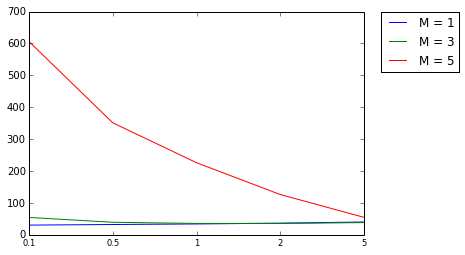

In [296]:
# Adding label to the plot
plt.plot(range(len(errorM1)),errorM1,label='M = 1')
plt.plot(range(len(errorM3)),errorM3,label='M = 3')
plt.plot(range(len(errorM5)),errorM5,label='M = 5')
#plt.plot(range(len(errorM10)),errorM10,label='M = 10')

plt.xticks(range(len(W1)),W1, size='small')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

# Question 4 (Sparsity and LASSO)

In [297]:
# Data for this question
import pdb
import random
import pylab as pl

# X is an array of N data points (one dimensional for now), that is, NX1
# Y is a Nx1 column vector of data values

def getData(name):
    data = pl.loadtxt(name)
    # Returns column matrices
    X = data[0:1].T
    Y = data[1:2].T
    return X, Y

def lassoTrainData():
    return getData('../DataFiles/HW1/lasso_train.txt')

def lassoValData():
    return getData('../DataFiles/HW1/lasso_validate.txt')

def lassoTestData():
    return getData('../DataFiles/HW1/lasso_test.txt')


In [304]:
from sklearn import linear_model

clf0_1 = linear_model.Lasso(alpha=0.1,fit_intercept=False) # alpha is the shrinkage parameter
clf0_5 = linear_model.Lasso(alpha=0.5,fit_intercept=False)
clf1 = linear_model.Lasso(alpha=1,fit_intercept=False)
clf2 = linear_model.Lasso(alpha=2,fit_intercept=False)
clf5 = linear_model.Lasso(alpha=5,fit_intercept=False)

In [305]:

def sineBasisFunction(X,y,n=13):
    designMat = np.zeros((len(X),n))
    designMat[:,0] = X.ravel()
    for i in range(1,n):
        #print([a**i for a in X])
        designMat[:,i] = [np.sin(0.4*np.pi*a*i) for a in X]
    return(designMat,y)

In [306]:
X = lassoTrainData()[0]
y = lassoTrainData()[1]

In [307]:
designMat = sineBasisFunction(X,y,n=13)[0]
outcome = sineBasisFunction(X,y,n=13)[1]

In [309]:
clf0_1.fit(designMat, outcome)
print(clf0_1.coef_)

[ 0.          0.          5.49526681  0.33802335  0.          1.12455954
  2.28295397  0.          0.         -0.         -0.          0.          0.        ]


In [310]:
clf0_5.fit(designMat, outcome)
print(clf0_5.coef_)

[ 0.          0.          4.56610215  0.76841601  0.          0.
  2.41591679  0.          0.         -0.         -0.          0.          0.        ]


In [311]:
clf1.fit(designMat, outcome)
print(clf1.coef_)

[ 0.          0.          4.25260727  0.02250036  0.          0.
  1.63404412  0.          0.         -0.         -0.          0.          0.        ]


In [312]:
clf2.fit(designMat, outcome)
print(clf2.coef_)

[ 0.          0.          2.56819399  0.          0.          0.          0.1812299
  0.          0.         -0.         -0.          0.          0.        ]


In [313]:
clf5.fit(designMat, outcome)
print(clf5.coef_)

[ 0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0.  0.  0.]


In [314]:
def ridgeRegressionGeneral(X,y,lambdaShrink):
    designMat = X
    m = X.shape[1]
    y = y.ravel() 
    mle = np.inner(np.dot(np.linalg.inv(np.dot(np.transpose(designMat),designMat)+lambdaShrink*np.identity(m)),np.transpose(designMat)),y)
    fittedValues = np.dot(designMat,np.transpose(mle))
    return(mle,fittedValues)
    

In [320]:
ridgeRegressionGeneral(designMat,y,5)[0]

array([ 0.91153888,  0.99983922,  1.31979847,  0.99484521,  0.63503341,
        0.64351949,  0.78405454,  0.60379734,  0.10904499, -0.21201041,
       -0.04773148,  0.27800422,  0.18142154])

# Validation

1

[-2, -1, -2, -1]

2.5

# Test